/tmp/ipykernel_5716/2852268562.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_pastel = plt.cm.get_cmap('RdPu')  # Oder wähle eine andere Pastellpalette
/tmp/ipykernel_5716/2852268562.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


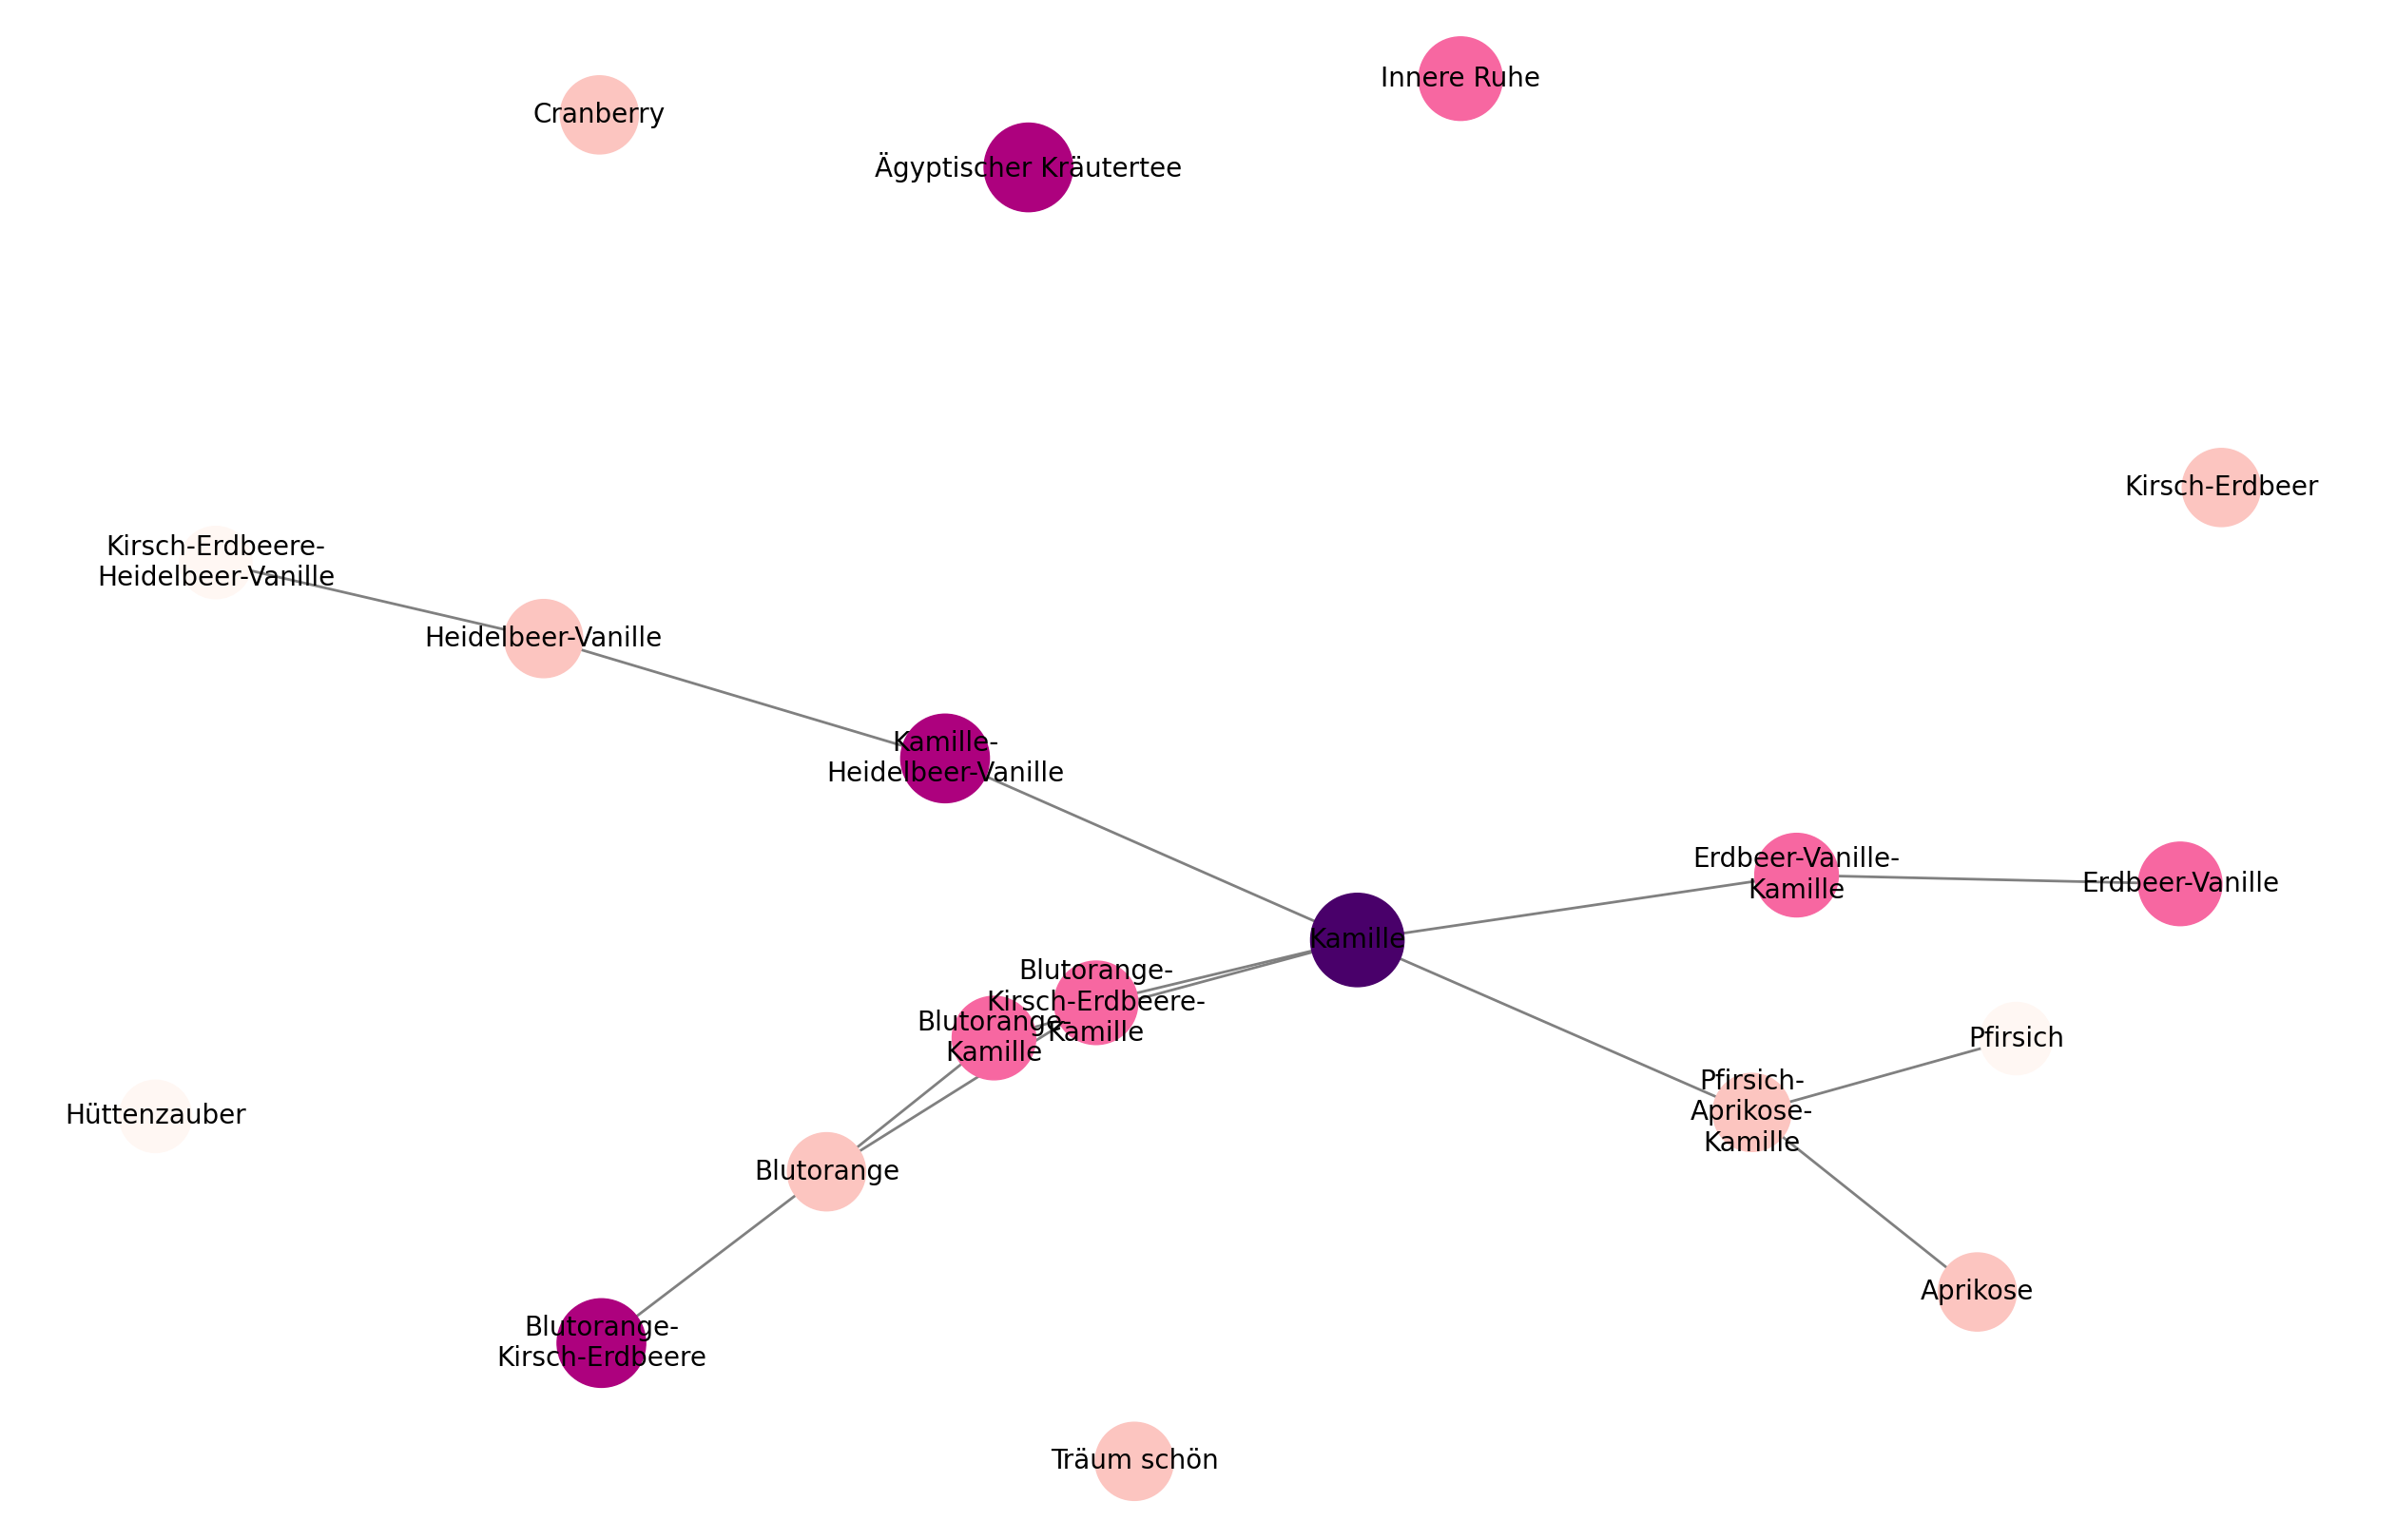

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

# Definieren der Teesorten als Klassen
class Tea:
    def __init__(self, name, rating, category):
        self.name = name
        self.rating = rating
        self.category = category  # z. B. 'Kräutertee', 'Früchtetee', etc.

# Teesorten als Objekte mit Kategorien, einschließlich der neuen Teesorten
teas_updated = [
    Tea("Innere Ruhe", 8, "Kräutertee"),
    Tea("Kirsch-Erdbeer", 7, "Früchtetee"),
    Tea("Kamille", 10, "Kräutertee"),
    Tea("Blutorange", 7, "Früchtetee"),
    Tea("Pfirsich", 6, "Früchtetee"),
    Tea("Heidelbeer-Vanille", 6, "Früchtetee"),
    Tea("Erdbeer-Vanille", 8, "Früchtetee"),
    Tea("Heidelbeer-Vanille", 7, "Früchtetee"),
    Tea("Hüttenzauber", 6, "Kräutertee"),
    Tea("Ägyptischer Kräutertee", 9, "Kräutertee"),
    Tea("Träum schön", 7, "Kräutertee"),
    Tea("Aprikose", 7, "Kräutertee")
]

# Erstelle eine Liste von Kombinationen der Teesorten als Mischungen, einschließlich der neuen Mischungen
mixes_updated = [
    ("Kamille-\nHeidelbeer-Vanille", ["Kamille", "Heidelbeer-Vanille"], 9),
    ("Blutorange-\nKamille", ["Blutorange", "Kamille"], 8),
    ("Kirsch-Erdbeere-\nHeidelbeer-Vanille", ["Kirsch-Erdbeere", "Heidelbeer-Vanille"], 6),
    ("Pfirsich-\nAprikose-\nKamille", ["Pfirsich", "Aprikose", "Kamille"], 7),
    ("Erdbeer-Vanille-\nKamille", ["Erdbeer-Vanille", "Kamille"], 8),
    ("Cranberry", ["Cranberry"], 7),
    ("Blutorange-\nKirsch-Erdbeere-\nKamille", ["Blutorange", "Kirsch-Erdbeere", "Kamille"], 8),
    ("Blutorange-\nKirsch-Erdbeere", ["Blutorange", "Kirsch-Erdbeere"], 9)
]

# Erstellen des Graphen
G_tea_filtered = nx.Graph()

# Füge Teesorten als Knoten hinzu
for tea in teas_updated:
    G_tea_filtered.add_node(tea.name, size=tea.rating)

# Füge die vorher definierten Mischungen als Knoten hinzu
for mix in mixes_updated:
    mix_name, mix_ingredients, _ = mix
    G_tea_filtered.add_node(mix_name, size=mix[2])

# Automatisierte Kanten basierend auf den definierten Teesorten und Mischungen
edges_tea_filtered = []
for mix in mixes_updated:
    mix_name, mix_ingredients, _ = mix
    for tea in teas_updated:
        if tea.name in mix_ingredients:
            edges_tea_filtered.append((tea.name, mix_name))

# Füge die Kanten zum Graphen hinzu
G_tea_filtered.add_edges_from(edges_tea_filtered)

# Normieren der Bewertungen für Heatmap-Darstellung
ratings_final_filtered = {tea.name: tea.rating for tea in teas_updated}
ratings_final_filtered.update({mix[0]: mix[2] for mix in mixes_updated})
normalized_ratings_filtered = [ratings_final_filtered[node] for node in G_tea_filtered.nodes]
min_rating_filtered = min(normalized_ratings_filtered)
max_rating_filtered = max(normalized_ratings_filtered)
normalized_ratings_filtered = [(rating - min_rating_filtered) / (max_rating_filtered - min_rating_filtered) for rating in normalized_ratings_filtered]

# Farbpalette für Pastellrot (dunkler = wichtiger)
cmap_pastel = plt.cm.get_cmap('RdPu')  # Oder wähle eine andere Pastellpalette
node_colors_filtered = [cmap_pastel(rating) for rating in normalized_ratings_filtered]

# Berechnen der Knotengrößen basierend auf den Bewertungen
node_sizes_tea_filtered = [G_tea_filtered.nodes[node]['size'] * 500 for node in G_tea_filtered.nodes]

# Definieren einer Position für die Knoten
pos_tea_filtered = nx.spring_layout(G_tea_filtered, seed=42, k=0.5)

# Erstellen des Graphen mit den neuen Farben und Knotengrößen
plt.figure(figsize=(25, 16))
nx.draw(G_tea_filtered, pos_tea_filtered, with_labels=True, node_size=node_sizes_tea_filtered, node_color=node_colors_filtered, font_size=20, edge_color='gray', width=2)

# Titel des Diagramms
plt.tight_layout()

# Graph anzeigen
plt.show()

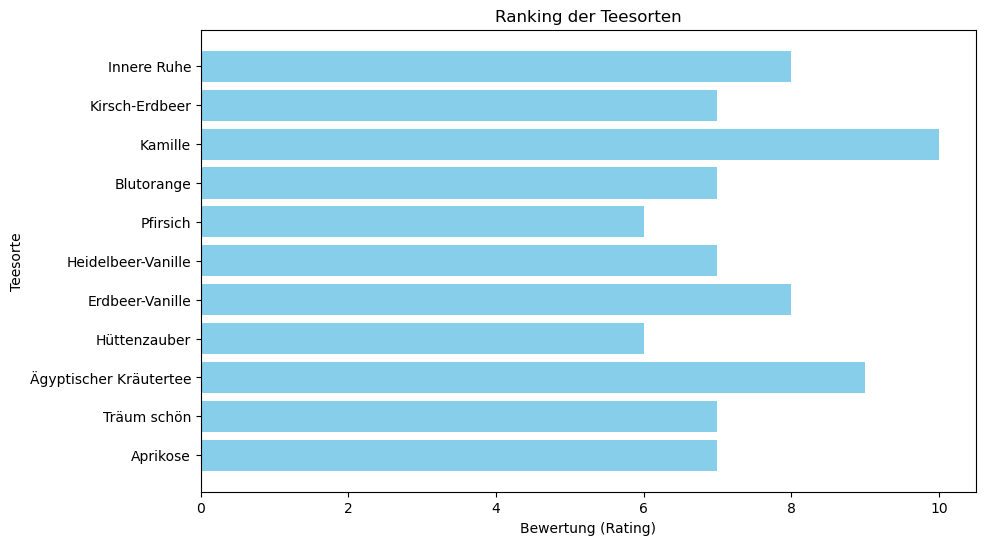

In [17]:
# Daten aufbereiten
tea_names = [tea.name for tea in teas_updated]
tea_ratings = [tea.rating for tea in teas_updated]

# Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.barh(tea_names, tea_ratings, color="skyblue")
plt.xlabel("Bewertung (Rating)")
plt.ylabel("Teesorte")
plt.title("Ranking der Teesorten")
plt.gca().invert_yaxis()  # Sortiere von oben nach unten
plt.show()